# KAGGLE
## House Price Predictions

In [1]:
# import data set

import pandas as pd

trainData = pd.read_csv('I:\\Learnings\\Machine Learning\\Projects\\Kaggle\\Housing Prices\\train.csv')
testData = pd.read_csv('I:\\Learnings\\Machine Learning\\Projects\\Kaggle\\Housing Prices\\test.csv')


 mu = 180921.20 and sigma = 79415.29



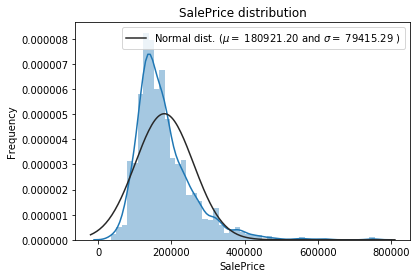

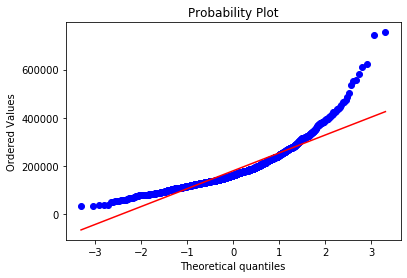

In [2]:
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import skew, norm

sns.distplot(trainData['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(trainData['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(trainData['SalePrice'], plot=plt)
plt.show() 

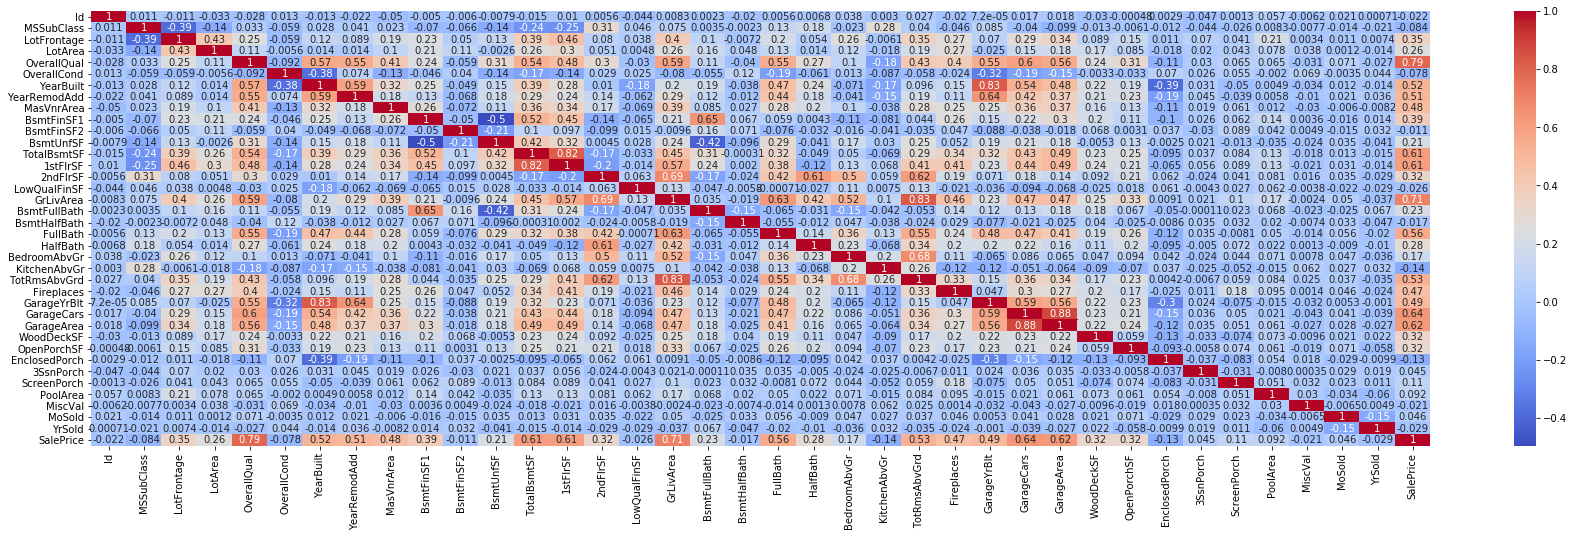

In [3]:
plt.figure(figsize=(30,8))
sns.heatmap(trainData.corr(),cmap='coolwarm',annot = True)
plt.show()

In [4]:
correlation = trainData.corr()
correlation[correlation['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [5]:
features = trainData[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

test_features = testData[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [6]:
total = features.isnull().sum().sort_values(ascending = False)
percent = (features.isnull().sum()/features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
2ndFlrSF,0,0.000000
OverallQual,0,0.000000
YearBuilt,0,0.000000
YearRemodAdd,0,0.000000
BsmtFinSF1,0,0.000000
TotalBsmtSF,0,0.000000
1stFlrSF,0,0.000000


In [7]:
features = features.drop(missing_data[missing_data['Total'] > 81].index,1)

In [8]:
test_features = test_features.drop(missing_data[missing_data['Total'] > 81].index,1)

In [9]:
# Categorical boolean mask
categorical_feature_mask = features.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = features.columns[categorical_feature_mask].tolist()
categorical_cols

[]

In [16]:
features.isnull().sum().sort_values(ascending = False)
features.GarageYrBlt.fillna(features.GarageYrBlt.mean(), inplace = True)
features.MasVnrArea.fillna(features.MasVnrArea.mean(), inplace = True)

features.isnull().sum().sort_values(ascending = False)

SalePrice       0
OpenPorchSF     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OverallQual     0
dtype: int64

In [30]:
test_features.isnull().sum().sort_values(ascending = False)
replaceNullWithRespectiveAvg(test_features,test_features.isnull().sum().sort_values(ascending = False).index[:6].tolist())


OpenPorchSF     0
2ndFlrSF        0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
WoodDeckSF      0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
OverallQual     0
dtype: int64

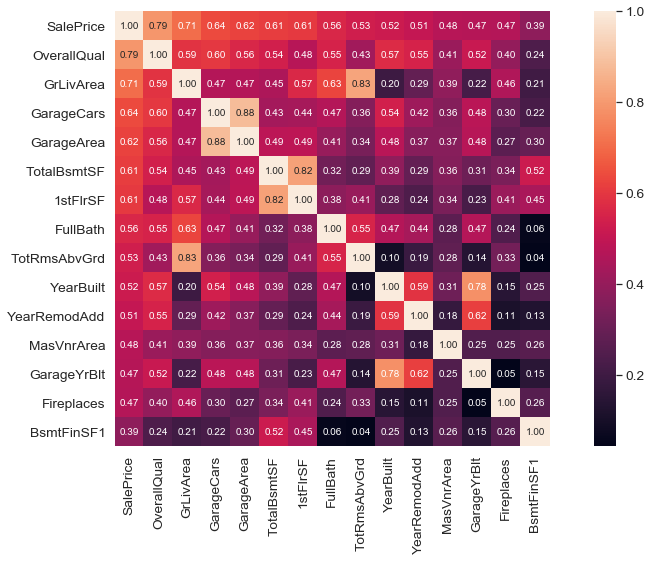

In [32]:
import numpy as np
#saleprice correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = features.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(features[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [33]:
#selecting the best 15 features for the model
features = features[cols]

In [34]:
test_features = test_features[cols.drop('SalePrice')]

In [35]:
#Split the train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features.drop('SalePrice', axis=1), features.SalePrice, random_state=101, test_size = 0.3)

In [39]:
y_train  = y_train.values.reshape(-1,1)
y_test  = y_test.values.reshape(-1,1)

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [49]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [50]:
print(regressor.intercept_)
print(regressor.coef_)

[6.60022817e-17]
[[ 0.29434388  0.31107005  0.05109985  0.06398884  0.11932473  0.02209143
  -0.044909    0.0334707   0.07675313  0.09456834  0.05714788  0.01910605
   0.04584189  0.1392006 ]]


In [51]:
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1,1)

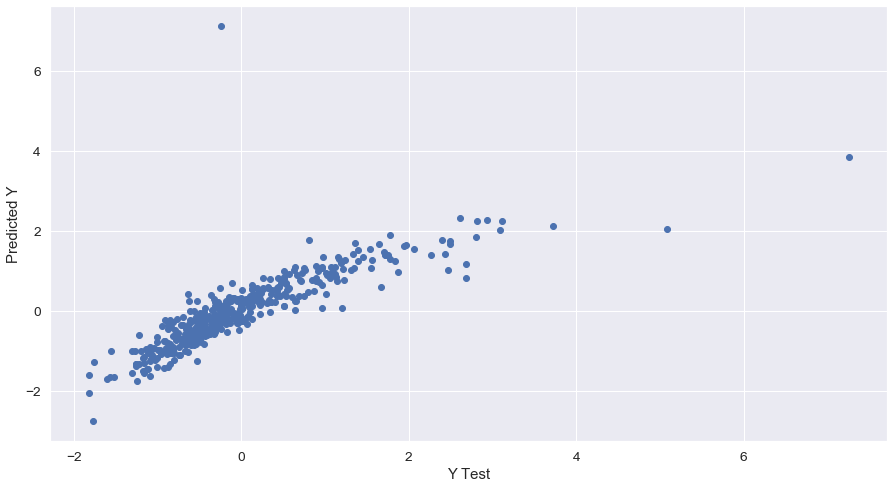

In [53]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

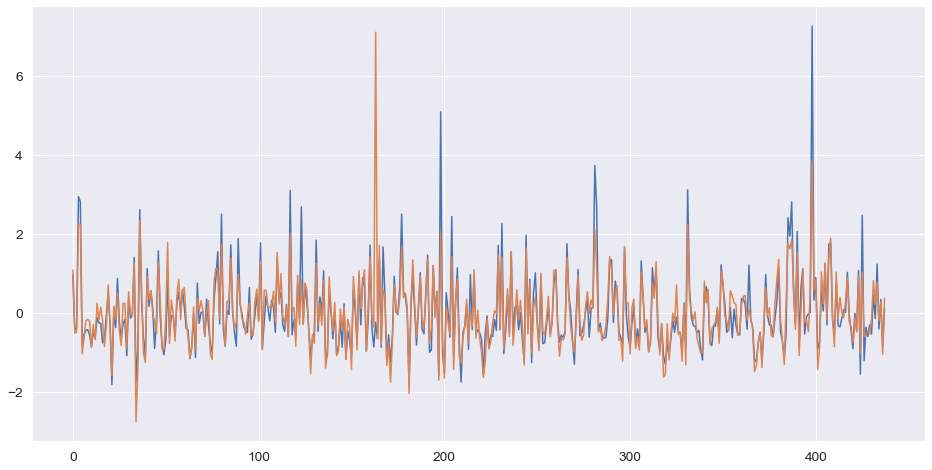

In [54]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(y_pred, label = 'predict')
plt.show()

In [56]:
# Get the evaluation metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2910540797178433
MSE: 0.29995756024517595
RMSE: 0.5476838141164808


# Modelling
-------------------------------------------------------------------------------------------------------------------------------
## 1. XGBoost

F:\InstalledPrograms\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 0.22995666513107496
MSE: 0.1155798519989582
RMSE: 0.3399703692955582


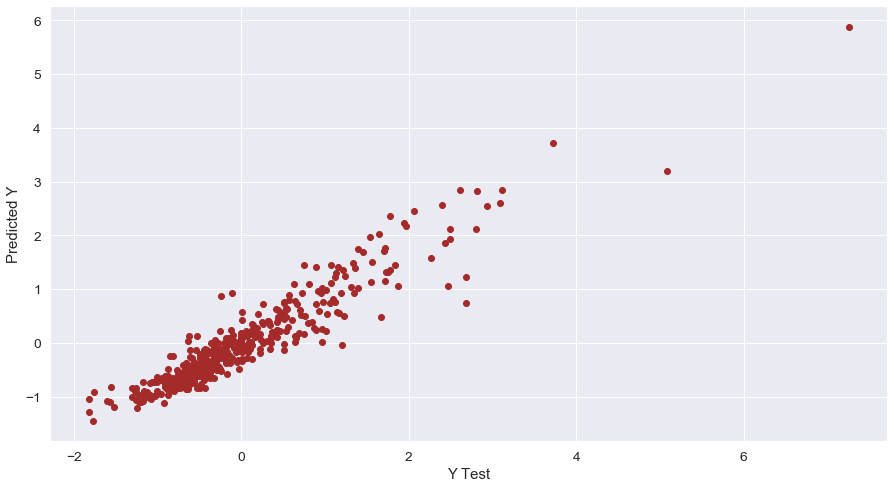

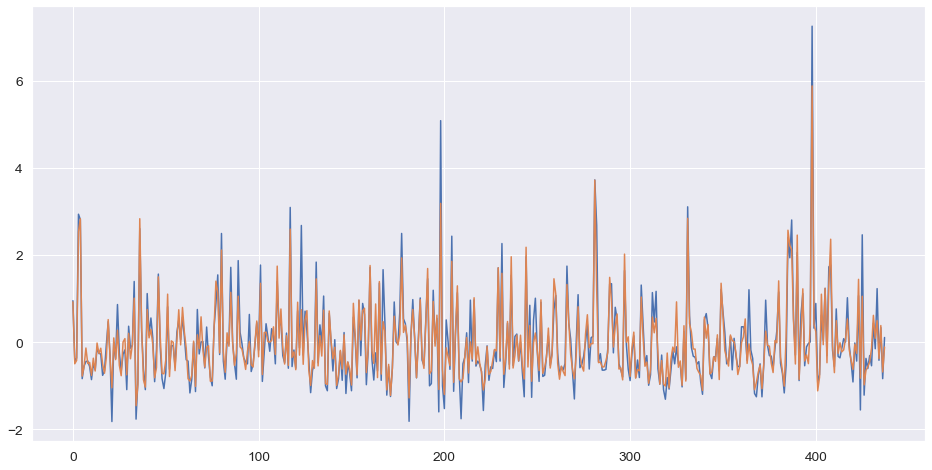

In [57]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(clf_pred, label = 'predict')
plt.show()

## 2. SVM 

F:\InstalledPrograms\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 0.2340167958999903
MSE: 0.1899647870349416
RMSE: 0.43584950044131243


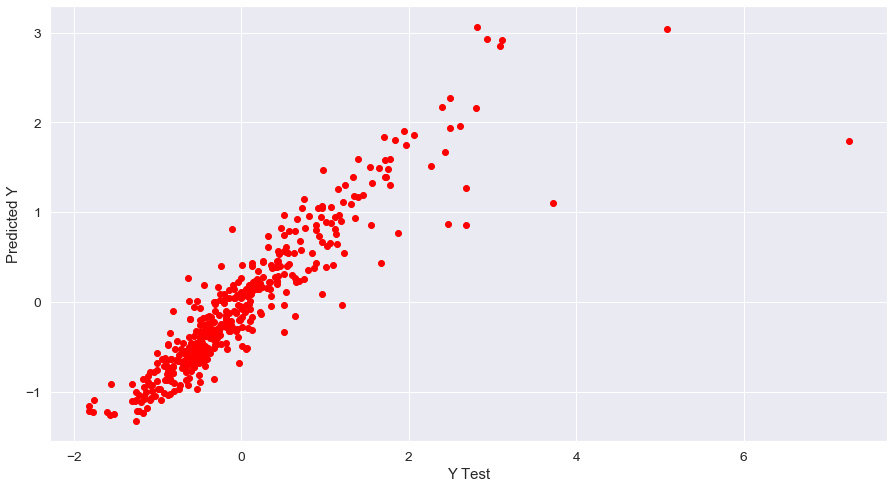

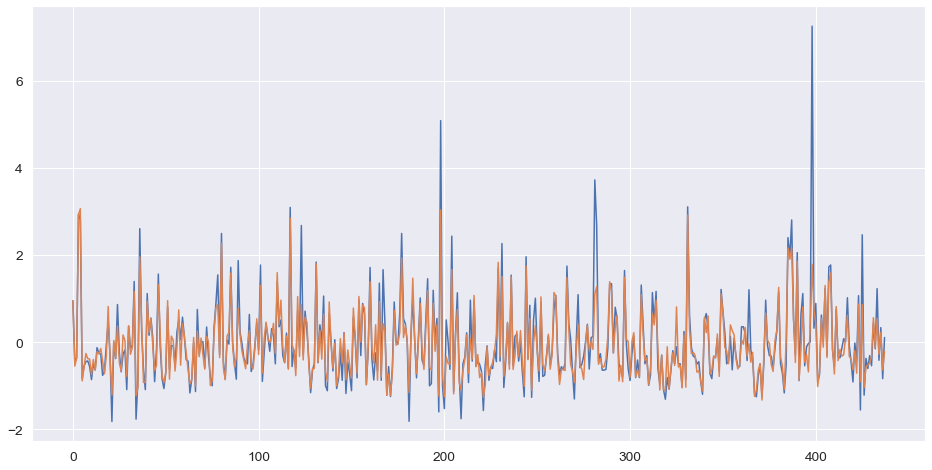

In [58]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(svr_pred, label = 'predict')
plt.show()

## 3. Random Forest

F:\InstalledPrograms\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MAE: 0.23592827927432142
MSE: 0.15184249281601425
RMSE: 0.38966972273454126


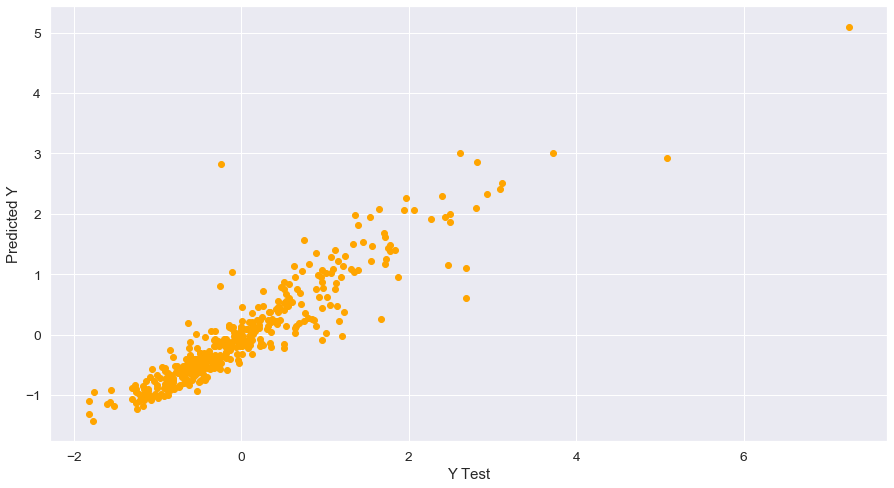

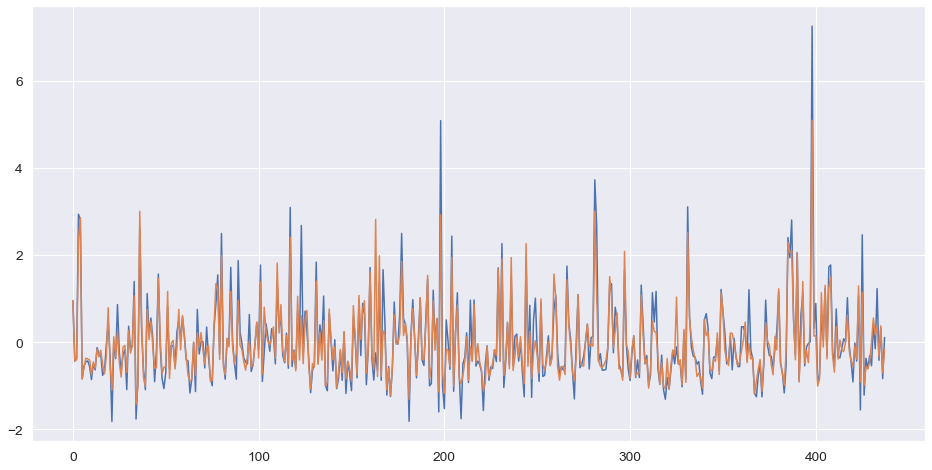

In [59]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(rfr_pred, label = 'predict')
plt.show()

## 4. Decision Tree

MAE: 0.3327904077116327
MSE: 0.2297983841710415
RMSE: 0.4793729072142496


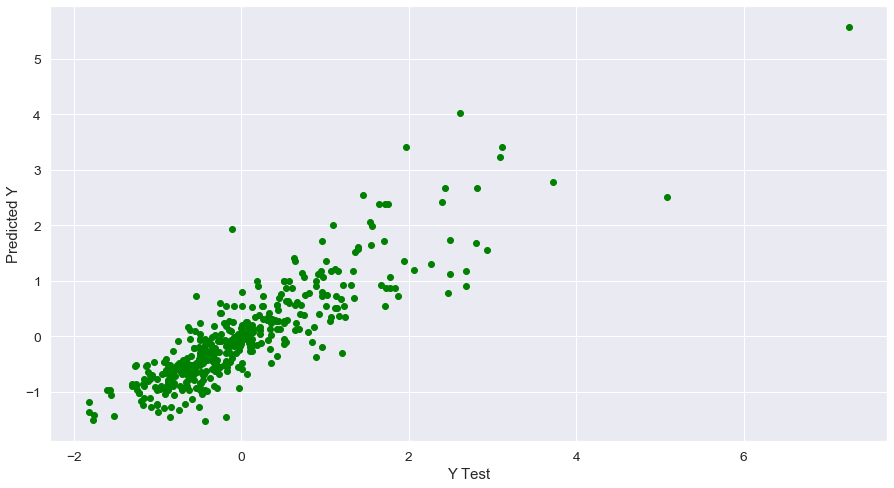

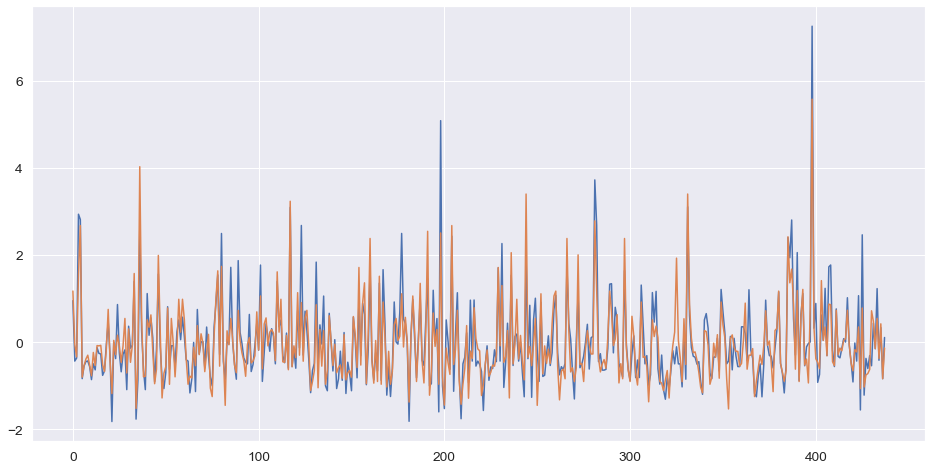

In [62]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(dtr_pred, label = 'predict')
plt.show()

## Comparison 

In [63]:
error_rate=np.array([metrics.mean_squared_error(y_test, y_pred),metrics.mean_squared_error(y_test, clf_pred),metrics.mean_squared_error(y_test, dtr_pred),metrics.mean_squared_error(y_test, svr_pred),metrics.mean_squared_error(y_test, rfr_pred)])

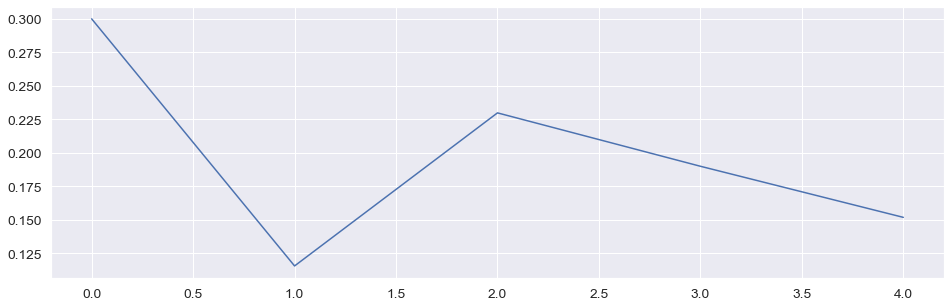

In [64]:
plt.figure(figsize=(16,5))
plt.plot(error_rate)

In [66]:
test_features

testing = sc_X.fit_transform(test_features)

In [68]:
test_prediction = clf.predict(testing)
test_prediction = test_prediction.reshape(-1,1)

In [70]:
test_id = testData['Id']
resultDf = pd.DataFrame(test_id, columns=['Id'])

In [72]:
test_prediction
test_prediction =sc_y.inverse_transform(test_prediction)

In [73]:
test_prediction = pd.DataFrame(test_prediction, columns=['SalePrice'])

In [75]:
resultDf = pd.concat([resultDf,test_prediction], axis=1)

In [78]:
resultDf.to_csv('I:\\Learnings\\Machine Learning\\Projects\\Kaggle\\Housing Prices\\final_result3.csv', index=False)

In [53]:
#data cleaning and handling null values

def displayColumnsWithNullValues(df):
    listOfCol = df.columns[df.isna().any()].tolist()
    print('Number of Columns with null values: ',len(listOfCol))
    print(df[listOfCol].tail())
    
mainData.shape

(1460, 81)

In [54]:
displayColumnsWithNullValues(mainData)

Number of Columns with null values:  19
      LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
1455         62.0   NaN       None         0.0       Gd       TA           No   
1456         85.0   NaN      Stone       119.0       Gd       TA           No   
1457         66.0   NaN       None         0.0       TA       Gd           No   
1458         68.0   NaN       None         0.0       TA       TA           Mn   
1459         75.0   NaN       None         0.0       TA       TA           No   

     BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType  GarageYrBlt  \
1455          Unf          Unf      SBrkr          TA     Attchd       1999.0   
1456          ALQ          Rec      SBrkr          TA     Attchd       1978.0   
1457          GLQ          Unf      SBrkr          Gd     Attchd       1941.0   
1458          GLQ          Rec      FuseA         NaN     Attchd       1950.0   
1459          BLQ          LwQ      SBrkr         NaN     Attchd    

In [27]:
#replacement fucntions

def replaceNullWithRespectiveAvg(df,columns):
    for column in columns:
        df[column].fillna(df[column].mean(), inplace = True)
        
def replaceNullWithNotApplicable(df,columns):
    for column in columns:
        df[column].fillna('NA', inplace = True)
                
def replaceNullWithZero(df,columns):
    for column in columns:
        df[column].fillna(0, inplace = True)
        


In [56]:
fillWithNAList = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','MSZoning','Utilities','Exterior1st','Exterior2nd','Functional','SaleType','KitchenQual']

fillWIthAvgList = ['LotFrontage']
fillWithZeroList = ['MasVnrArea','LotFrontage','BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath', 'GarageCars', 'GarageArea','BsmtFinSF1','BsmtFinSF2']


In [57]:
replaceNullWithNotApplicable(mainData,fillWithNAList)
replaceNullWithZero(mainData,fillWithZeroList)
mainData = mainData.drop('GarageYrBlt', axis = 1)

In [58]:
X = mainData.iloc[:,:-1]
y = mainData.iloc[:,-1].values
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [59]:
X = pd.get_dummies(X, drop_first = True)


In [60]:
X.columns[IndexOfSelectedFeatures]

Index(['LotArea', 'OverallQual', 'GrLivArea', 'GarageCars', 'MiscVal',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Condition2_PosN',
       'Condition2_RRAn', 'Exterior1st_ImStucc', 'Exterior2nd_Other',
       'MasVnrType_NA', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Po',
       'BsmtCond_Po', 'SaleType_Con', 'SaleType_New', 'SaleCondition_Alloca',
       'SaleCondition_Partial'],
      dtype='object')

In [45]:
X.head()
X = X.values

In [47]:
X.shape

(1460, 261)

In [48]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from numpy import set_printoptions
selectionTool = SelectKBest(score_func=f_classif, k=20)
features = selectionTool.fit(X,y)
IndexOfSelectedFeatures = list(np.where(features.get_support() == True)[0])
features = features.transform(X)
IndexOfSelectedFeatures
# features.shape

F:\InstalledPrograms\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


[3,
 4,
 16,
 25,
 33,
 70,
 71,
 91,
 93,
 124,
 140,
 148,
 152,
 153,
 156,
 169,
 249,
 253,
 257,
 260]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
import numpy as np
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[215178.89 231500.  ]
 [158272.91 179500.  ]
 [109248.66 122000.  ]
 [ 53199.81  84500.  ]
 [140381.6  142000.  ]
 [330399.83 325624.  ]
 [313243.3  285000.  ]
 [173043.67 151000.  ]
 [221220.97 195000.  ]
 [209755.24 275000.  ]
 [152000.45 175000.  ]
 [ 16611.92  61000.  ]
 [215317.26 174000.  ]
 [311434.81 385000.  ]
 [223391.54 230000.  ]
 [122455.43  87000.  ]
 [106428.66 125000.  ]
 [138740.57  98600.  ]
 [215321.49 260000.  ]
 [128788.69 143000.  ]
 [ 95705.53 124000.  ]
 [162208.61 122500.  ]
 [221988.64 236500.  ]
 [373019.45 337500.  ]
 [141990.25  76000.  ]
 [184310.39 187000.  ]
 [161824.64 128000.  ]
 [183854.02 179000.  ]
 [435932.74 485000.  ]
 [137564.3  122500.  ]
 [173566.01 106000.  ]
 [134280.6  118000.  ]
 [105340.67 127000.  ]
 [ 92066.77  80000.  ]
 [141188.11 153000.  ]
 [317196.88 360000.  ]
 [130687.65 132000.  ]
 [ 66279.56  85500.  ]
 [225277.28 262280.  ]
 [108127.24 112000.  ]
 [142570.8  131000.  ]
 [140369.71 139000.  ]
 [118576.72  87000.  ]
 [126451.01

In [20]:
# Apply algorithm on actual test set
mainTestData = pd.read_csv('I:\\Learnings\\Machine Learning\\Projects\\Kaggle\\Housing Prices\\test.csv')
Ids = mainTestData['Id']

In [24]:
displayColumnsWithNullValues(mainTestData)

Number of Columns with null values:  0
Empty DataFrame
Columns: []
Index: [1454, 1455, 1456, 1457, 1458]


In [22]:
mainTestData.Utilities.unique()

array(['AllPub', nan], dtype=object)

In [23]:
replaceNullWithNotApplicable(mainTestData,fillWithNAList)
replaceNullWithZero(mainTestData,fillWithZeroList)
mainTestData = mainTestData.drop('GarageYrBlt', axis = 1)

In [25]:
mainTestData = pd.get_dummies(mainTestData, drop_first = True)

In [26]:
mainTestData.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,0,1,0,0,0,1,0


In [63]:
test_features = mainTestData[['LotArea', 'OverallQual', 'GrLivArea', 'GarageCars', 'MiscVal',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Condition2_PosN',
       'Condition2_Norm', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'MasVnrType_NA', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Po',
       'BsmtCond_Po', 'SaleType_Con', 'SaleType_New', 'SaleCondition_Alloca',
       'SaleCondition_Partial']].values
test_features

array([[1.16e+04, 5.00e+00, 8.96e+02, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.43e+04, 6.00e+00, 1.33e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.38e+04, 5.00e+00, 1.63e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [2.00e+04, 5.00e+00, 1.22e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.04e+04, 5.00e+00, 9.70e+02, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [9.63e+03, 7.00e+00, 2.00e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [62]:
mainTestData[['LotArea', 'OverallQual', 'GrLivArea', 'GarageCars', 'MiscVal',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Condition2_PosN',
       'Condition2_Norm', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'MasVnrType_NA', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Po',
       'BsmtCond_Po', 'SaleType_Con', 'SaleType_New', 'SaleCondition_Alloca',
       'SaleCondition_Partial']]

,LotArea,OverallQual,GrLivArea,GarageCars,MiscVal,Neighborhood_NoRidge,Neighborhood_NridgHt,Condition2_PosN,Condition2_Norm,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_NA,ExterQual_Gd,ExterQual_TA,ExterCond_Po,BsmtCond_Po,SaleType_Con,SaleType_New,SaleCondition_Alloca,SaleCondition_Partial
0,11622,5,896,1.0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0
1,14267,6,1329,1.0,12500,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,13830,5,1629,2.0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0
3,9978,6,1604,2.0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0
4,5005,8,1280,2.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,4,1092,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1455,1894,4,1092,1.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1456,20000,5,1224,2.0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0
1457,10441,5,970,0.0,700,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [64]:
y_actual_pred = regressor.predict(test_features)

In [ ]:
# Export the result set
resultDf= pd.DataFrame({'SalePrice' : list(y_actual_pred)})
resultDf['Id'] = Ids
resultDf.to_csv('I:\\Learnings\\Machine Learning\\Projects\\Kaggle\\Housing Prices\\final_result.csv', index=False)